In [1]:
from sympy import *
import numpy as np
import transformations
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

In [21]:
q1, q2, q3, q4, q5, q6 = symbols('q1:7')
l1, l2, l3, l4, l5, l6 = symbols('l1:7')
qdot_1, qdot_2, qdot_3, qdot_4, qdot_5, qdot_6 = symbols('qdot_1:7')

def skew(vec):
    return Matrix([[      0, -vec[2], vec[1]],
                   [ vec[2],       0,-vec[0]],
                   [-vec[1],  vec[0],     0]])

def homo_trans(a, alpha, d, q):
    return Matrix([[           cos(q),           -sin(q),           0,             a],
                   [sin(q)*cos(alpha), cos(alpha)*cos(q), -sin(alpha), -d*sin(alpha)],
                   [sin(alpha)*sin(q), sin(alpha)*cos(q),  cos(alpha),  d*cos(alpha)],
                   [                0,                 0,           0,             1]])

def rot_z(q):
    return Matrix([[cos(q), -sin(q), 0],
                   [sin(q),  cos(q), 0],
                   [     0,       0, 1]])
def trans(x, y, z):
    return Matrix([[x],
                   [y],
                   [z]])

R01 = rot_z(q1)
R12 = rot_z(q2)
R23 = rot_z(0.0)
P = trans(sin(q2)*l1*qdot_1, cos(q2)*l1*qdot_1 + l2*(qdot_1 + qdot_2), 0)

In [22]:
v03 = R01*R12*R23*P
print(pretty(simplify(v03)))

⎡-l₁⋅q̇₁⋅sin(q₁) - l₂⋅q̇₁⋅sin(q₁ + q₂) - l₂⋅q̇₂⋅sin(q₁ + q₂)⎤
⎢                                                           ⎥
⎢l₁⋅q̇₁⋅cos(q₁) + l₂⋅q̇₁⋅cos(q₁ + q₂) + l₂⋅q̇₂⋅cos(q₁ + q₂) ⎥
⎢                                                           ⎥
⎣                             0                             ⎦


# E5.1

In [13]:
def vii(R, P, v, w):
    return simplify(R*(v + skew(w)*P))

def wii(R,w,qdot,Z):
    return simplify(R*w + qdot*Z)


T01 = homo_trans(0, 0, 0, q1)
T12 = homo_trans(l1, pi/2, 0, q2)
T23 = homo_trans(l2, 0, 0, q3)
T34 = homo_trans(l3, 0, 0, 0)

Z = trans(0, 0, 1)

R21 = (T12[:3,:3]).inv()
R32 = (T23[:3,:3]).inv()
R43 = (T34[:3,:3]).inv()

P12 = trans(l1, 0, 0) 
P23 = trans(l2, 0, 0)
P34 = trans(l3, 0, 0)

v00 = trans(0, 0, 0)
w00 = trans(0, 0, 0) 

v11 = trans(0, 0, 0)
w11 = trans(0, 0, qdot_1)

v22 = vii(R21, P12, v11, w11)#simplify(R21*skew(w11)*P12)
w22 = wii(R21, w11, qdot_2, Z)#simplify(R21*w11 + trans(0, 0, qdot_2))

v33 = vii(R32, P23, v22, w22)
w33 = wii(R32, w22, qdot_3, Z)

v44 = vii(R43, P34, v33, w33)
w44 = wii(R43, w33, 0, Z)
#print(pretty(v33))
pretty_print(v44)
#pretty_print(w44)

⎡             l₂⋅q̇₂⋅sin(q₃)             ⎤
⎢                                        ⎥
⎢    l₂⋅q̇₂⋅cos(q₃) + l₃⋅(q̇₂ + q̇₃)     ⎥
⎢                                        ⎥
⎣-q̇₁⋅(l₁ + l₂⋅cos(q₂) + l₃⋅cos(q₂ + q₃))⎦


# E5.3

In [14]:
T04 = simplify(T01*T12*T23*T34)
pretty_print(T04[:3,3])

⎡(l₁ + l₂⋅cos(q₂) + l₃⋅cos(q₂ + q₃))⋅cos(q₁)⎤
⎢                                           ⎥
⎢(l₁ + l₂⋅cos(q₂) + l₃⋅cos(q₂ + q₃))⋅sin(q₁)⎥
⎢                                           ⎥
⎣       l₂⋅sin(q₂) + l₃⋅sin(q₂ + q₃)        ⎦


In [15]:
J0 = (T04[:3,3]).jacobian([q1, q2, q3])
R40 = simplify(T04[:3,:3].inv())
J4 = simplify(R40*J0)
#print(R40)
pretty_print(J4)

⎡                0                     l₂⋅sin(q₃)     0 ⎤
⎢                                                       ⎥
⎢                0                   l₂⋅cos(q₃) + l₃  l₃⎥
⎢                                                       ⎥
⎣-l₁ - l₂⋅cos(q₂) - l₃⋅cos(q₂ + q₃)         0         0 ⎦


# E5.5

In [16]:
## PUMA 560 from RoboMC
a2, a3 = symbols('a2:4')
d3, d4 = symbols('d3:5')
T01 = homo_trans(0, 0, 0, q1)
T12 = homo_trans(0, -pi/2, 0, q2)
T23 = homo_trans(a2, 0, d3, q3)
T34 = homo_trans(a3, -pi/2, d4, q4)
T45 = homo_trans(0, pi/2, 0, q5)
T56 = homo_trans(0, -pi/2, 0, q6)

T06 = simplify(T01*T12*T23*T34*T45*T56)

In [ ]:
#pretty_print(simplify(T06[0,3]))

In [18]:
P06 = T06[:3,3]
R60 = (T06[:3,:3]).inv()
# J0 = P06.jacobian([q1, q2, q3, q4, q5, q6])
# J6 = simplify(R60*J0)
#pretty_print(R60)

# E5.6 

In [ ]:
d1, d2, d3 = symbols('d1:4')
a1, a2, a3 = symbols('a1:4')
alpha1, alpha2, alpha3 = symbols('alpha1:4') 
T01 = homo_trans(a1, alpha1,  d1, q1)
T12 = homo_trans(a2, alpha2,  d2, q2)
T23 = homo_trans(a3, alpha3,  d3, q3)

T03 = simplify(T01*T12*T23)

In [ ]:
P03 = T03[:3,3]
J0 = P03.jacobian([q1, q2, q3])

# E5.8 

In [ ]:
pretty_print(simplify((-l1*sin(q1)-l2*sin(q1+q2))*(-l2*sin(q1+q2)) + (l1*cos(q1)+l2*cos(q1+q2))*(l2*cos(q1+q2))))

# E5.11 

In [ ]:
zeros(6)

In [ ]:
def adjoint(T):
    Ad = zeros(6)
    Ad[:3,:3] = T[:3,:3]
    Ad[3:,3:] = T[:3,:3]
    Ad[:3,3:] = skew(T[:3,3])*T[:3,:3]
    return Ad
vA = Matrix([[0.0],[2],[-3],[1.414],[1.414],[0]])
TBA = Matrix([[0.866,  -0.5, 0.0, 10],
              [  0.5, 0.866, 0.0,0.0],
              [  0.0,   0.0, 1.0,  5],
              [  0.0,   0.0, 0.0,  1]])
ad = adjoint(TBA.inv())
vB = ad*vA

In [ ]:
pretty_print(ad)
pretty_print(vB)

# matlab Excersie 

In [72]:
%matplotlib inline
def Jacobian(theta):
    q1 = theta[0] 
    q2 = theta[1]
    q3 = theta[2]
    l1 = 4
    l2 = 3
    l3 = 2
    return np.array([[-l1*np.sin(q1) -l2*sin(q1+q2) -l3*sin(q1+q2+q3), -l2*sin(q1+q2) -l3*sin(q1+q2+q3), -l3*sin(q1+q2+q3)],
                     [  l1*cos(q1) + l2*cos(q1+q2) + l3*cos(q1+q2+q3), l2*cos(q1+q2) + l3*cos(q1+q2+q3),  l3*cos(q1+q2+q3)],
                     [                                              1,                                1,                 1]],dtype=np.float)

def rot(y, t):
    xdot = np.array([[0.2],[-0.3],[-0.2]])
    dydt = np.dot(np.linalg.pinv(Jacobian(y)), xdot).reshape((3,))
    return dydt

def fk(q1, q2, q3):
    l1 = 4
    l2 = 3
    l3 = 2
    return np.array([[4*np.cos(q1) + 3*np.cos(q1 + q2) + 2*np.cos(q1 + q2 + q3)],
                     [4*np.sin(q1) + 3*np.sin(q1 + q2) + 2*np.sin(q1 + q2 + q3)],
                     [          q1 +                q2 +                     q3]],dtype=np.float64)

In [70]:
t0 = 0
t1 = 5
dt = 0.1
tspan = np.arange(t0, t1, dt)
xdot = np.array([[0.2],[-0.3],[-0.2]])
y0 = np.deg2rad(np.array([[10], [20], [30]]))
y = y0.copy()
ys = y0.copy()
J = []
J.append(np.linalg.det(Jacobian(y[:, 0])))
for t in tspan[1:]:
    dydt = np.dot(np.linalg.pinv(Jacobian(y[:, 0])), xdot).reshape((3,1))
    y += dydt * dt
    ys = np.hstack((ys, y))
    J.append(np.linalg.det(Jacobian(y[:, 0])))
ys = np.rad2deg(ys.T)

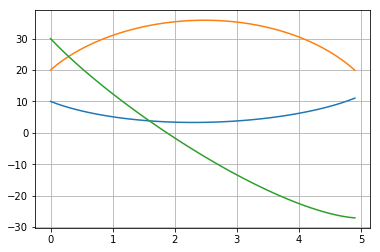

In [64]:
plt.plot(tspan, ys[:,0], tspan, ys[:,1], tspan, ys[:,2])
plt.grid(true)

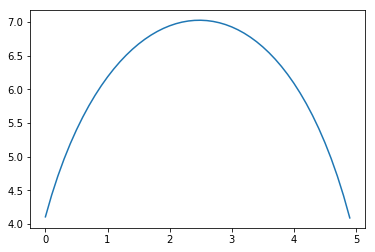

In [71]:
plt.plot(tspan, J)


In [87]:
ys = np.deg2rad(ys)
x, y, th = fk(ys[:, 0], ys[:, 1], ys[:, 2])
x, y, th = x.T, y.T, th.T

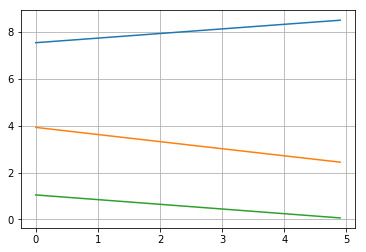

In [89]:
plt.plot(tspan, x, tspan, y, tspan, th)
plt.grid(true)

In [100]:
y0 = np.deg2rad(np.array([10, 20, 30]))
t = np.arange(0, 5, 0.1)
sol = odeint(rot, y0, t)
sol_deg = np.rad2deg(sol)

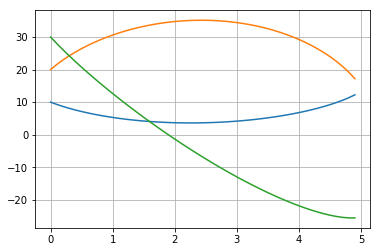

In [101]:
plt.plot(t, sol_deg[:,0], t, sol_deg[:,1], t, sol_deg[:,2])
plt.grid(true)

In [102]:
x, y, th = fk(sol[:, 0], sol[:, 1], sol[:, 2])
x, y, th = x.T, y.T, th.T

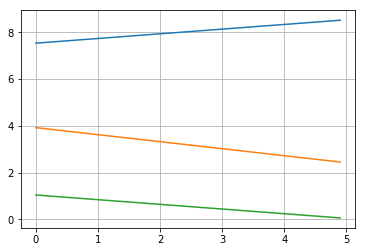

In [103]:
plt.plot(tspan, x, tspan, y, tspan, th)
plt.grid(true)

T01 = homo_trans(0, 0, 0, q1)
T12 = homo_trans(4, 0, 0, q2)
T23 = homo_trans(3, 0, 0, q3)
T34 = homo_trans(2, 0, 0,  0)

T04 = simplify(T01*T12*T23*T34)
P04 = T04[:2,3]


In [24]:
#pretty_print(P04)
pretty_print(P04.jacobian([q1, q2, q3]))

⎡-4⋅sin(q₁) - 3⋅sin(q₁ + q₂)  -3⋅sin(q₁ + q₂)  0⎤
⎢                                               ⎥
⎢4⋅cos(q₁) + 3⋅cos(q₁ + q₂)   3⋅cos(q₁ + q₂)   0⎥
⎢                                               ⎥
⎣             0                      0         0⎦


# shitty thing I'm working on IK using gredient decent 

In [93]:
fin = P04.evalf(subs={q1:pi/6, q2:pi/6, q3:pi/6})
print(fin)

Matrix([
[4.96410161513775],
[6.59807621135332]])


In [94]:
fin = np.array([[4.96410161513775],
                [6.59807621135332]],dtype=np.float64)

In [110]:
def fk(q1, q2, q3):
    l1 = 4
    l2 = 3
    l3 = 2
    return np.array([[4*np.cos(q1) + 3*np.cos(q1 + q2) + 2*np.cos(q1 + q2 + q3)],
                     [4*np.sin(q1) + 3*np.sin(q1 + q2) + 2*np.sin(q1 + q2 + q3)]],dtype=np.float64)
def JacT(q1, q2, q3):
    l1 = 4
    l2 = 3
    l3 = 2
    return np.array([[-l1*np.sin(q1) - l2*np.sin(q1 + q2) - l3*np.sin(q1 + q2 + q3), l1*np.cos(q1) + l2*np.cos(q1 + q2) + l3*cos(q1 + q2 + q3)], 
                     [-l2*np.sin(q1 + q2) - l3*np.sin(q1 + q2 + q3), l2*np.cos(q2 + q3) + l3*np.cos(q1 + q2 + q3)], 
                     [-l3*np.sin(q1 + q2 + q3), l3*np.cos(q1 + q2 + q3)]],dtype=np.float64)

def error(q1, q2, q3):
    return (fk(q1, q2, q3) - fin)
def cost(q1, q2, q3):
    return 0.5*np.linalg.norm(fk(q1, q2, q3) - fin)

In [125]:
q = np.array([[0.0],[0.0],[0.0]],dtype=np.float64)
alpha = 0.01
err = error(q[0,0],q[1,0],q[2,0])
while cost(q[0,0],q[1,0],q[2,0]) > 0.0001:
#for i in range(25):
    q -= alpha*np.dot(JacT(q[0,0],q[1,0],q[2,0]),err)
    err = error(q[0,0],q[1,0],q[2,0])
    #print(cost(q[0,0],q[1,0],q[2,0]))

In [126]:
np.rad2deg(q)

array([[ 29.43808397],
       [ 31.91459936],
       [ 27.43245377]])

In [127]:
fk(q[0,0],q[1,0],q[2,0])

array([[ 4.9642031 ],
       [ 6.59824344]])